In [1]:
from PIL import Image
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import traceback

In [2]:
def crop(im,height,width):
    imgwidth, imgheight = im.size
    for i in range(imgheight//height):
        for j in range(imgwidth//width):
            box = (j*width, i*height, (j+1)*width, (i+1)*height)
            yield im.crop(box)

In [3]:
if __name__=='__main__':
    imgdir = '../The-first-assignment-for-IPA/Lab1-Images/Lab1-Images/lena1.png'
    basename = 'img-*.png'
    filelist = glob.glob(os.path.join(imgdir,basename))

In [4]:
img = Image.open(imgdir)
iwidth, iheight = img.size
height = iheight/2
width =  iwidth/2

In [5]:
f = 0
for k, piece in enumerate(crop(img,height,width),f):
    f +=1
    img=Image.new('L', (width,height), 255)
    img.paste(piece)
    path = os.path.join("../The-first-assignment-for-IPA/Results/Splitting/Grid/%d_1%05d.png" % (int(k+1),f))
    img.save(path)

In [6]:
imageFolderPath = '../The-first-assignment-for-IPA/Results/Splitting/Grid/'
imagePath = glob.glob(imageFolderPath+'/*.png') 
im_array = np.array(Image.open(imagePath[0]).convert('L'), 'f')               
im_array = np.expand_dims(im_array, axis=0)                                   

for c in range(1, len(imagePath)):                                               
     im_array_new = np.array(Image.open(imagePath[c]).convert('L'), 'f')       
     im_array_new = np.expand_dims(im_array_new, axis=0)                       
     im_array = np.append(im_array, im_array_new, axis=0)

In [7]:
im_array

array([[[ 137.,  136.,  133., ...,  102.,   96.,  105.],
        [ 137.,  136.,  133., ...,  102.,   96.,  105.],
        [ 138.,  133.,  134., ...,   99.,   97.,  103.],
        ..., 
        [  71.,   71.,   68., ...,  181.,  188.,  178.],
        [  66.,   66.,   71., ...,  189.,  172.,   94.],
        [  65.,   69.,   69., ...,  158.,   74.,   65.]],

       [[ 111.,  103.,   99., ...,  145.,  148.,  114.],
        [ 111.,  103.,   99., ...,  145.,  148.,  114.],
        [ 106.,  103.,   99., ...,  133.,  125.,   87.],
        ..., 
        [ 113.,   83.,  101., ...,  114.,  115.,  110.],
        [  81.,   92.,   93., ...,  113.,  113.,  110.],
        [  74.,   70.,   72., ...,  117.,  117.,  110.]],

       [[  64.,   69.,   68., ...,   54.,   53.,   54.],
        [  64.,   72.,   68., ...,   42.,   38.,   31.],
        [  62.,   68.,   66., ...,   30.,   19.,   20.],
        ..., 
        [  28.,   28.,   29., ...,   98.,   96.,  102.],
        [  20.,   25.,   26., ...,  101., 

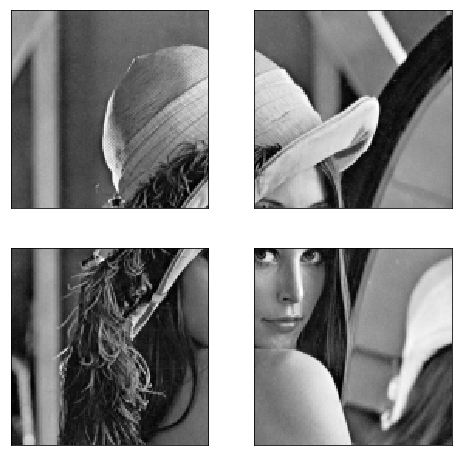

In [8]:
plt.figure(figsize=(8, 8))
for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(im_array[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()